## PROJECT OBJECTIVE

At the end of this project, the insights will respond to the following questions;

Which mode of shipping is preferable?

Which customer segment is more profitable ?

Which Region makes more profit?

Which Category and sub-category makes the most sales?

Which city is preferable for business?

In [165]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## READING THE DATA

In [166]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/GitHub Projects/njimonda.github.io/Store-Sales-Analysis-and-Forecasting/SuperStore_data.csv")

In [167]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.0,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,6.8714


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10296 non-null  object 
 1   Order ID       10296 non-null  object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quanti

In [169]:
df.shape

(10296, 21)

In [170]:
df.describe()

## Dataframe has no NaN values. Lets look at its statistical view. using describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [171]:
df.describe(include='object')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,10296,10296,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,10001,5015,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,Yes,CA-2017-100111,09-05-2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,296,15,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [172]:
#column names of table
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [173]:
#check data type of columns/attributes
df.dtypes

Row ID            object
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

There are categorical and numerical data in this dataset. For now, let's take a look whether there is missing data. The table below shows that there are not any missing data.

Now, we will take a look at the columns into two categories: Categorical and numerical data. For this section, we will have a general understanding of the most important columns. Next section we will explore correlation among columns.

Now, we will take a look at the columns into two categories: Categorical and numerical data. For this section, we will have a general understanding of the most important columns. Next section we will explore correlation among columns.

Categorical columns:

Order Date
Ship Date
Ship mode
Segment
City
State
Region
Category
Subcategory

Numerical columns:

Quantity
Sales
Profit
Discount

## Data Cleaing

In [174]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date       302
Ship Date        302
Ship Mode        302
Customer ID      302
Customer Name    302
Segment          302
Country          302
City             302
State            302
Postal Code      302
Region           302
Product ID       302
Category         302
Sub-Category     302
Product Name     302
Sales            302
Quantity         302
Discount         302
Profit           302
dtype: int64

In [175]:
df.duplicated().sum()

0

In [176]:
df.drop_duplicates(inplace= True)

In [177]:
df.duplicated().sum()

0

In [178]:
df=df.dropna(axis=0) # since only 11 records (that too of continuous variable) were missing so it is efficient to use dropna here.

In [179]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [180]:
#Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [181]:
Q25 = np.quantile(df['Sales'],q=0.25)
Q75 = np.quantile(df['Sales'],q=0.75)
IQR = Q75 - Q25
cut_off = IQR * 1.5

print('Number of Sales Lower Outliers : ',df[df['Sales']<=(Q25 - cut_off)]['Sales'].count())
print('Number of Sales Upper Outliers : ',df[df['Sales']>=(Q75 + cut_off)]['Sales'].count())

Number of Sales Lower Outliers :  0
Number of Sales Upper Outliers :  1167


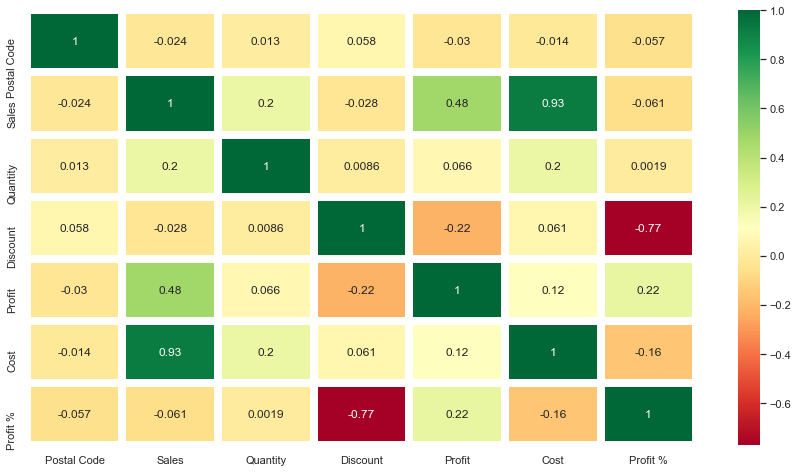

In [284]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', lw = 8, linecolor = 'white');


Analysis:
We can notice sales is fairly related to profit and discount is negatively related to profit.

Intrepreted as higher sales and lesser discounts leads to more profit.

It is also noticable that postal code has nothing to do with overall profit

## Univariate Analysis

Since univariate analysis deal with one variable at a time, we will check frequency of most of the columns, using subplots.

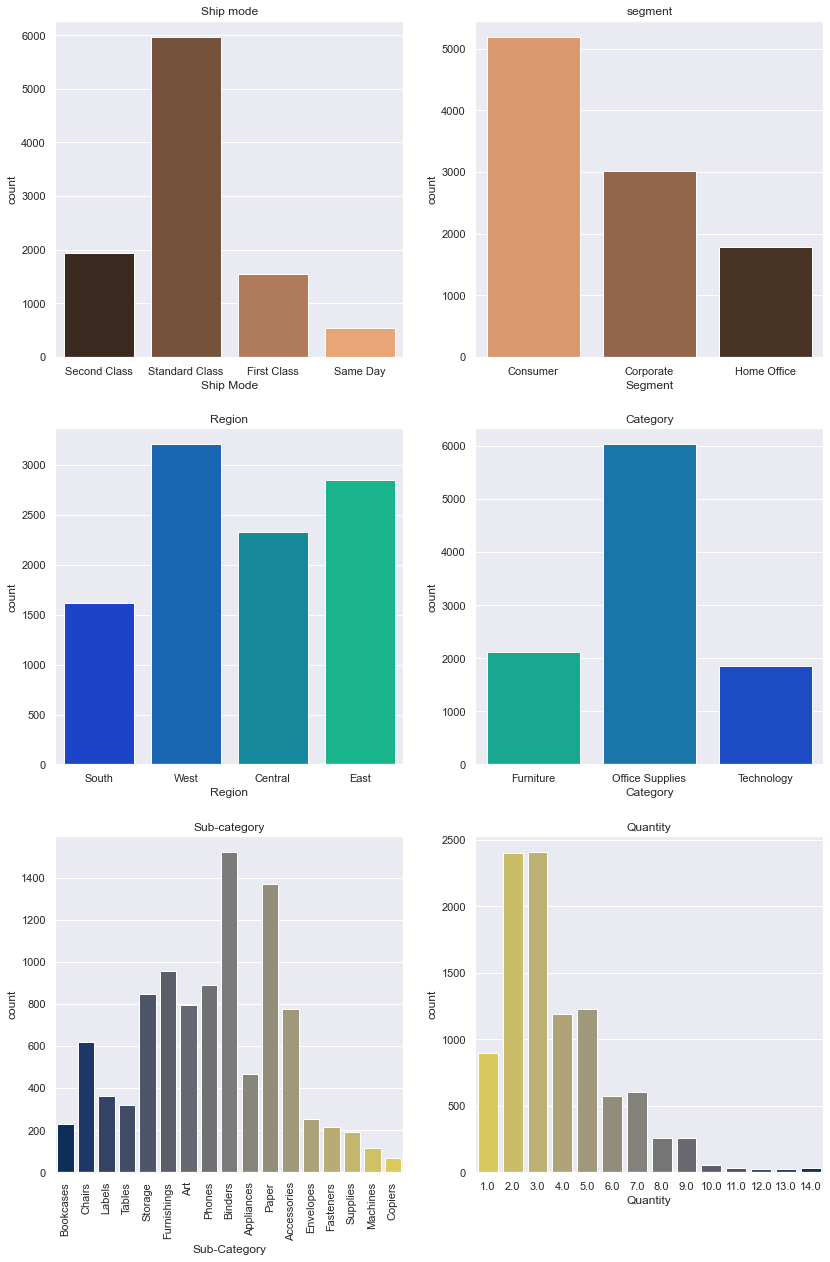

In [182]:
fig, axes = plt.subplots(3,2, figsize = (12,18))
sns.set_theme(style="darkgrid")
axes[0,0].set_title("Ship mode")
axes[0,1].set_title("segment")
axes[1,0].set_title("Region")
axes[1,1].set_title("Category")
axes[2,0].set_title("Sub-category")
axes[2,1].set_title("Quantity")

sns.countplot(x=df['Ship Mode'],
              palette = 'copper',
              orient='h',
              ax=axes[0,0])

sns.countplot(x=df['Segment'],
              palette = 'copper_r',
              orient='h',
              ax=axes[0,1])

sns.countplot(x=df['Region'],
              palette = 'winter',
              orient='h',
              ax=axes[1,0])

sns.countplot(x=df['Category'],
              palette = 'winter_r',
              orient='h',
              ax=axes[1,1])

sns.countplot(x=df['Sub-Category'],
              palette = 'cividis',
              orient='h',
              ax=axes[2,0])

sns.countplot(x=df['Quantity'],
              palette = 'cividis_r',
              orient='h',
              ax=axes[2,1])

axes[2,0].set_xticklabels(list(df['Sub-Category'].unique()), rotation=90)

plt.tight_layout(pad=2);

<AxesSubplot: xlabel='Segment', ylabel='count'>

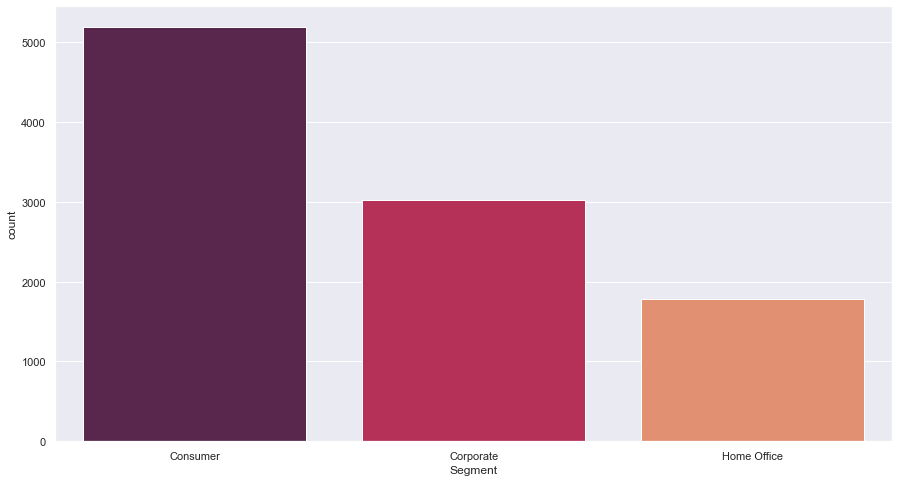

In [257]:
sns.countplot(x=df['Segment'],palette='rocket')

<AxesSubplot: title={'center': 'Most Popular Category'}>

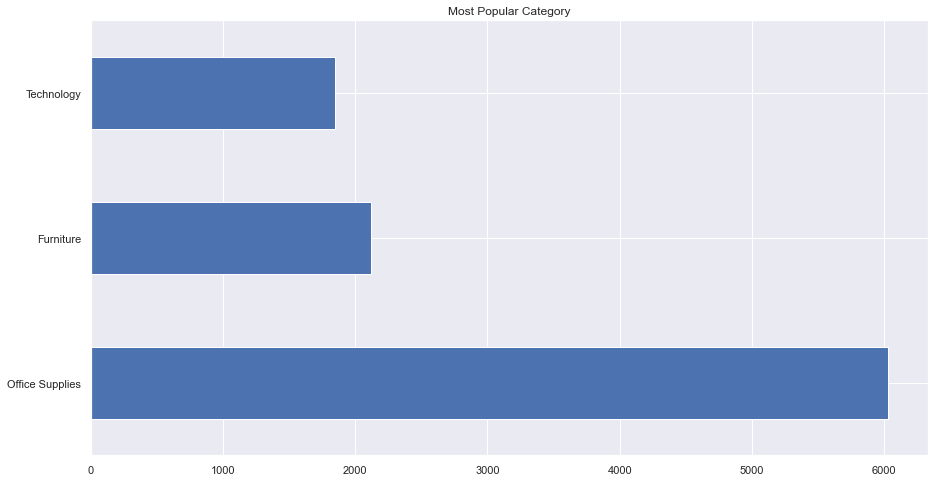

In [263]:
sns.set(rc = {'figure.figsize':(15,8)})

df['Category'].value_counts().plot(kind='barh',title='Most Popular Category')

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

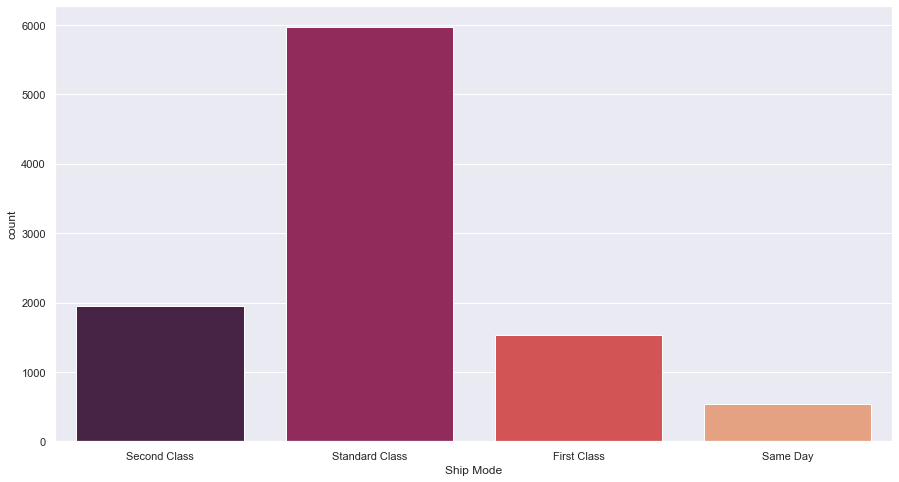

In [262]:
sns.countplot(x=df['Ship Mode'],palette='rocket')

<AxesSubplot: xlabel='Segment', ylabel='count'>

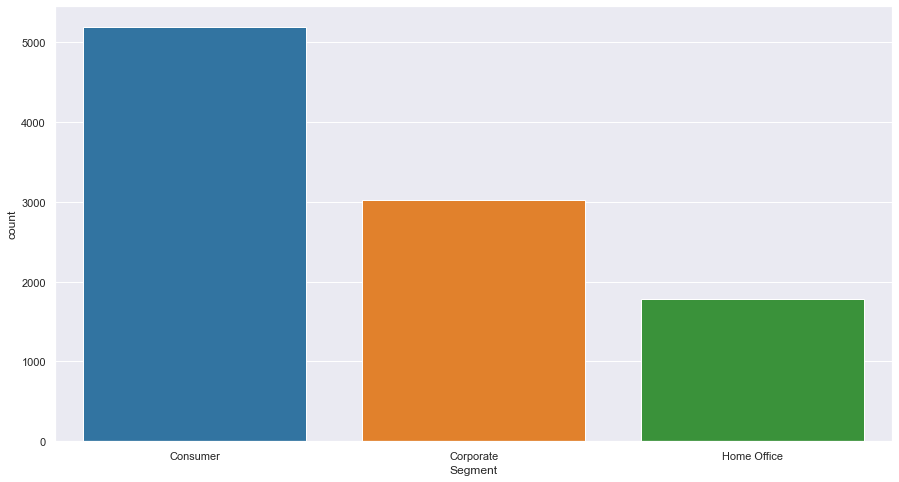

In [264]:
sns.countplot(x='Segment', data=df, palette='tab10')

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

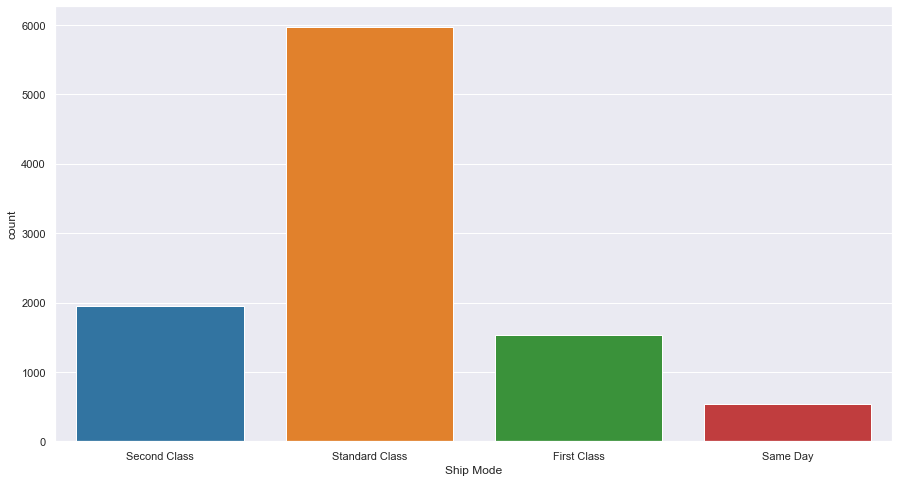

In [265]:
sns.countplot(x='Ship Mode', data=df, palette='tab10')

## Bivariate Analysis

We will be comparing other features to profit, sales and quantities to get a visual idea about what affects the profit most.

### 1 Ship-Mode

In [183]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df

,Profit,Sales,Quantity
Ship Mode,,,
First Class,48969.8399,3.514284e+05,5693.0
Same Day,15891.7589,1.283631e+05,1960.0
Second Class,57446.6354,4.591936e+05,7423.0
Standard Class,164088.7875,1.358216e+06,22797.0


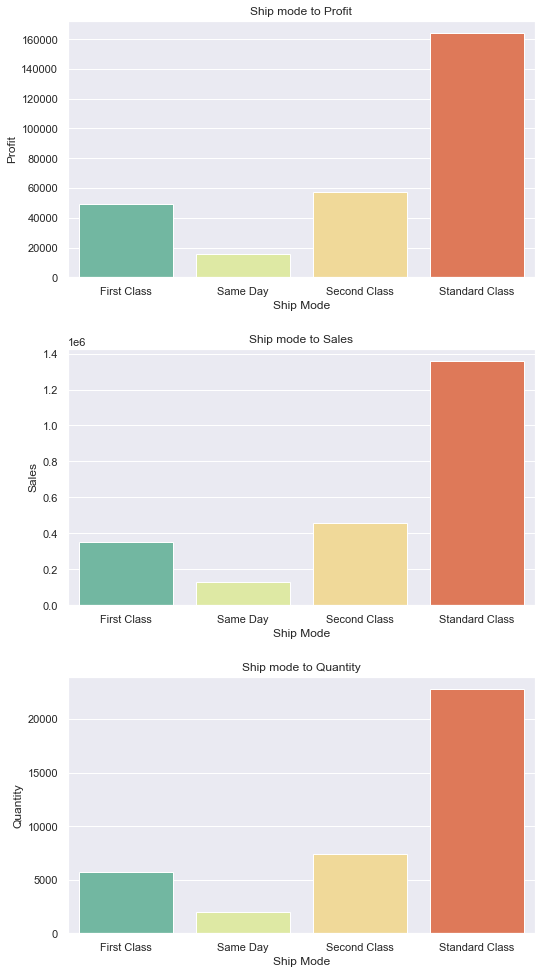

In [184]:
fig, axes = plt.subplots(3,1, figsize=(8,14))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Profit")
axes[1].set_title("Ship mode to Sales")
axes[2].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index,
           y=ship_df['Profit'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[0]);

sns.barplot(x=ship_df.index,
           y=ship_df['Sales'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[1]);

sns.barplot(x=ship_df.index,
           y=ship_df['Quantity'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[2])

plt.tight_layout(pad=2);

## 2. Segment

In [185]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134119.2092,1.161401e+06,19521.0
Corporate,91979.1340,7.061464e+05,11608.0
Home Office,60298.6785,4.296531e+05,6744.0


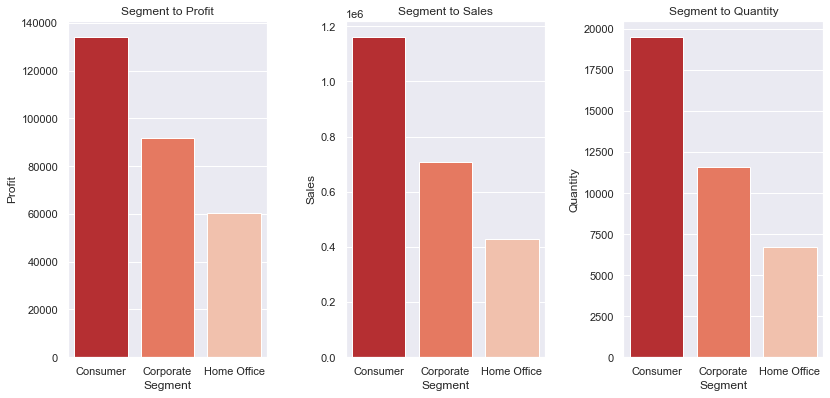

In [186]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
           y=segment_df['Profit'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[0])

sns.barplot(x=segment_df.index,
           y=segment_df['Sales'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[1])

sns.barplot(x=segment_df.index,
           y=segment_df['Quantity'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[2])

plt.tight_layout(pad=2);


Analysis:

Consumer segment is most profitable, followed by Corporate Segment and home offices. Hence, marketing strategy has to target or place more focus on retaining consumers.

## 3. Region

In [187]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39706.3625,501239.8908,8780.0
East,91522.7800,678781.2400,10618.0
South,46749.4303,391721.9050,6209.0
West,108418.4489,725457.8245,12266.0


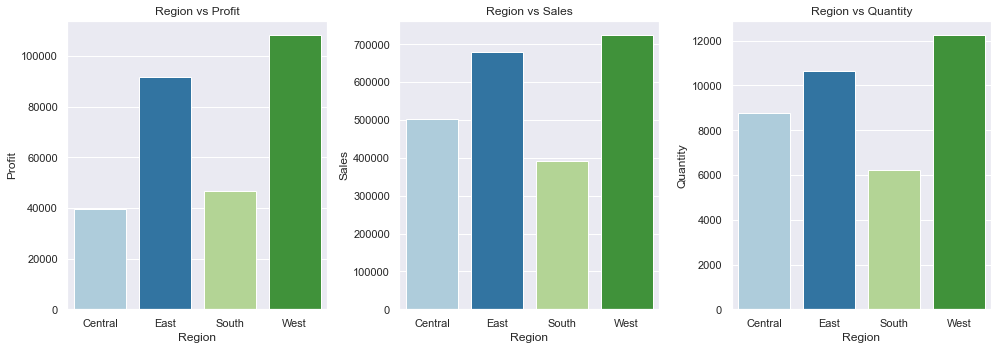

In [188]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")
axes[2].set_title("Region vs Quantity")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

sns.barplot(x=region_df.index,
           y='Quantity',
           data=region_df,
           palette='Paired',
           ax=axes[2])

plt.tight_layout(pad=1);


Analysis:

Among every region, west and east region recorded more profit. So, strategy should focus more on east and west region.

## 4. Category

In [189]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18451.2728,741999.7953,8028.0
Office Supplies,122490.8008,719047.0320,22906.0
Technology,145454.9481,836154.0330,6939.0


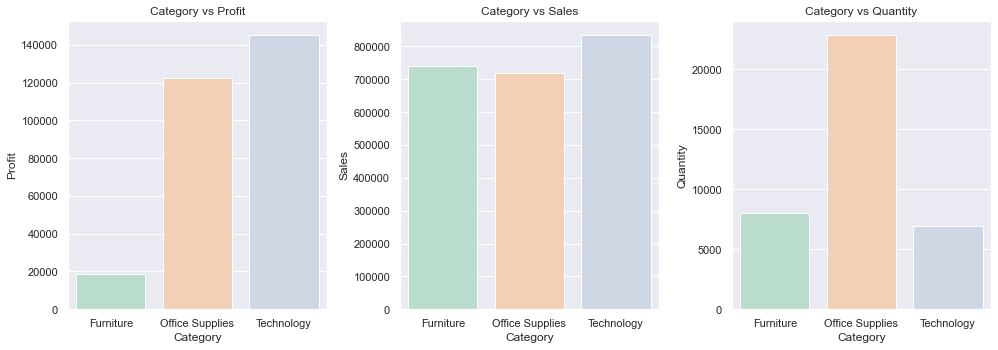

In [190]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1);

In [191]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976.0
Appliances,18138.0054,107532.1610,1729.0
Art,6527.7870,27118.7920,3000.0
Binders,30221.7633,203412.7330,5974.0
Bookcases,-3472.5560,114879.9963,868.0
Chairs,26590.1663,328449.1030,2356.0
Copiers,55617.8249,149528.0300,234.0
Envelopes,6964.1767,16476.4020,906.0
Fasteners,949.5182,3024.2800,914.0


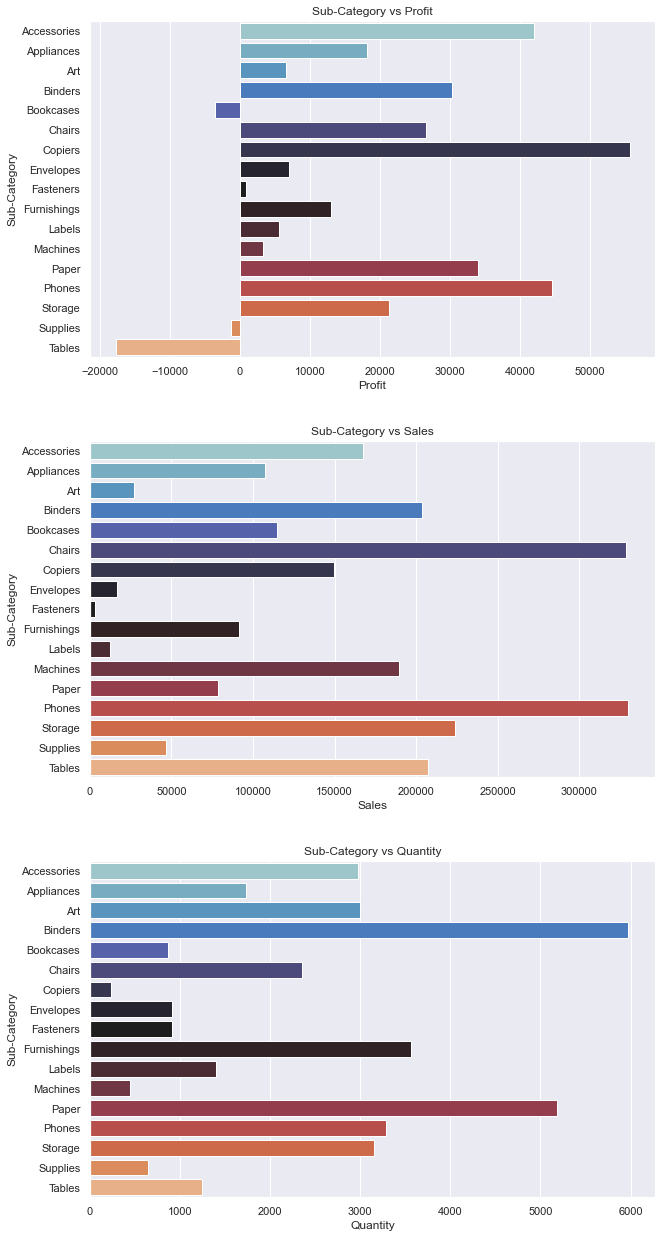

In [192]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='icefire',
           ax=axes[2])

plt.tight_layout(pad=3);


Analysis:

With analyzing these graphs, we may say that copiers, accesories and phones have more sales and profit.

## 6. Cities

In [193]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
top10 = cities_df.head(10)
last10 = cities_df.tail(10)

In [194]:
high_low = top10.append(last10)

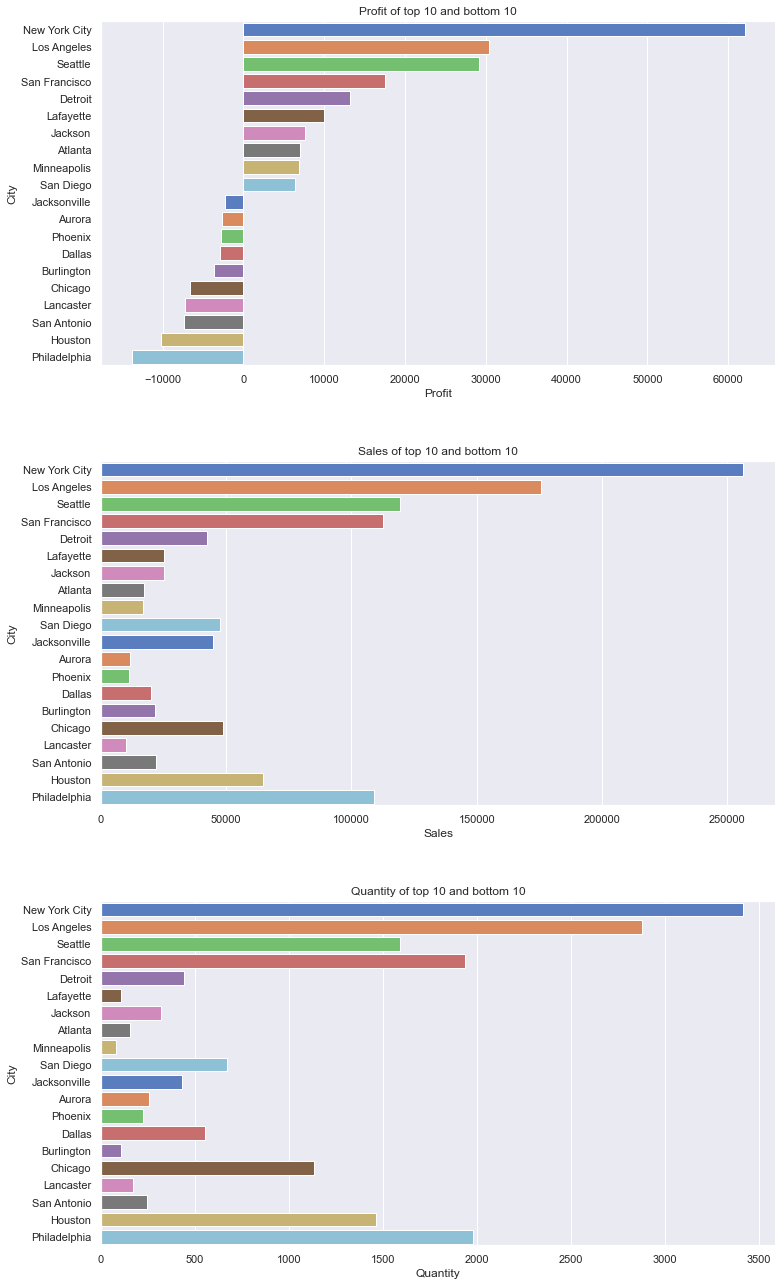

In [195]:
fig, axes = plt.subplots(3,1, figsize=(12, 19))

axes[0].set_title("Profit of top 10 and bottom 10")
axes[1].set_title("Sales of top 10 and bottom 10")
axes[2].set_title("Quantity of top 10 and bottom 10")

sns.barplot(y=high_low.index,
           x='Profit',
           data=high_low,
           palette='muted',
           ax=axes[0])

sns.barplot(y=high_low.index,
           x='Sales',
           data=high_low,
           palette='muted',
           ax=axes[1])

sns.barplot(y=high_low.index,
           x='Quantity',
           data=high_low,
           palette='muted',
           ax=axes[2])

plt.tight_layout(pad=4);


Analysis:

New York have the most sales and profit.
With a fairly high quantity and sales at Philadelphia, Houston and Chicago, profit at these places is in negative.
There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

In [196]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [197]:
#dropping Country column
df=df.drop('Country',axis=1)

In [200]:
data_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
data_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


In [201]:
df[['Sales','Discount','Profit','Quantity']].describe().style.background_gradient(cmap='Blues')

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [202]:
#Grouping the data by state, Sort the data by Sales and highlight Sales and Profits 
df.groupby('State').sum().sort_values('Sales',ascending=False).head(10).\
style.background_gradient(subset='Sales',cmap='Blues').\
background_gradient(subset='Profit',cmap='Blues')

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
California,184382639.000000,457687.631500,7667.000000,145.600000,76381.387100
New York,11835721.000000,310876.271000,4224.000000,62.400000,74038.548600
Texas,75747693.000000,170188.045800,3724.000000,364.640000,-25729.356300
Washington,49661687.000000,138641.270000,1883.000000,32.400000,33402.651700
Pennsylvania,11190565.000000,116511.914000,2153.000000,192.900000,-15559.960300
Florida,12640225.000000,89473.708000,1379.000000,114.650000,-3399.301700
Illinois,29873772.000000,80166.101000,1845.000000,191.900000,-12607.887000
Ohio,20579836.000000,78258.136000,1759.000000,152.400000,-16971.376600
Michigan,12356103.000000,76269.614000,946.000000,1.800000,24463.187600


In [203]:
colors_4 = ['magenta','yellow','orange','red']
colors_3 = ['green', 'blue','cyan']

<AxesSubplot: xlabel='Ship Mode'>

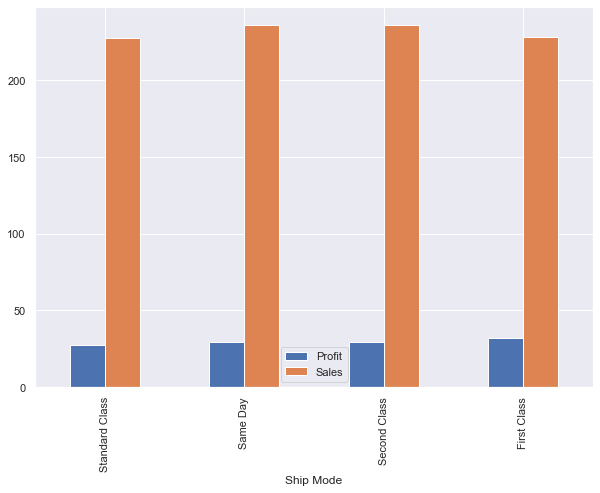

In [204]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

In [205]:
data_shipmode.sum(axis=0)

Sales       928.565508
Profit      118.136854
Discount      0.615922
dtype: float64

In [206]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%'] = data_shipmode['Profit']/1.181

In [207]:
data_shipmode.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,227.583067,27.494770,0.160023,24.510831,23.280923
Same Day,236.396179,29.266591,0.152394,25.460008,24.781195
Second Class,236.089239,29.535545,0.138895,25.426951,25.008929
First Class,228.497024,31.839948,0.164610,24.609265,26.960159


Sales¶
Lowest sales: Standard Class(24.51%)
Highest sales: Same Day(25.46%)
Profit
Lowest profit: Standard Class(23.28%)
Highest profit: First class(26.96%)
Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis.
[2] Analysis based on segment

In [209]:
data_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

<AxesSubplot: xlabel='Segment'>

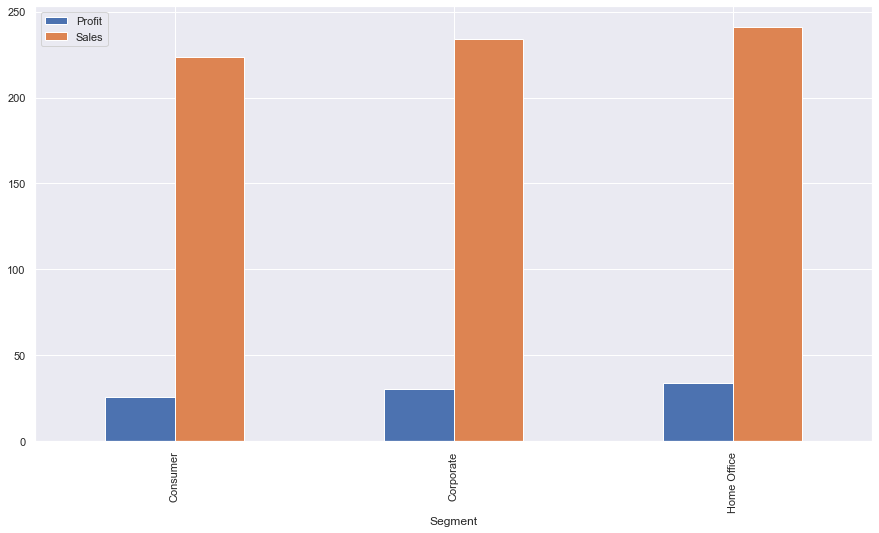

In [210]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

In [211]:
data_segment.sum(axis=0)

Sales       698.528985
Profit       90.112204
Discount      0.463498
dtype: float64

In [212]:
data_segment['Sales%'] = data_segment['Sales']/6.985
data_segment['Profit%'] = data_segment['Profit']/0.9011

In [213]:
data_segment.sort_values('Profit')

,Sales,Profit,Discount,Sales%,Profit%
Segment,,,,,
Consumer,223.733644,25.836873,0.158141,32.030586,28.672593
Corporate,233.823300,30.456667,0.158228,33.475061,33.799431
Home Office,240.972041,33.818664,0.147128,34.498503,37.530423


Sales
Lowest sales: Consumer(32.03%)
Highest sales: Home Office(34.50%)
Profit
Lowest profit: Consumer(28.67%)
Highest profit: Home Office(37.53%)
Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis. The corporates are on the second position for both sales an profits with Home office leading the drive in the best way for the company

In [253]:
data_state = df.groupby(['State'])[['Sales','Profit','Discount']].mean()
data_state1 = data_state.sort_values('Profit')
data_state2 = data_state.sort_values('Sales')

<AxesSubplot: xlabel='State'>

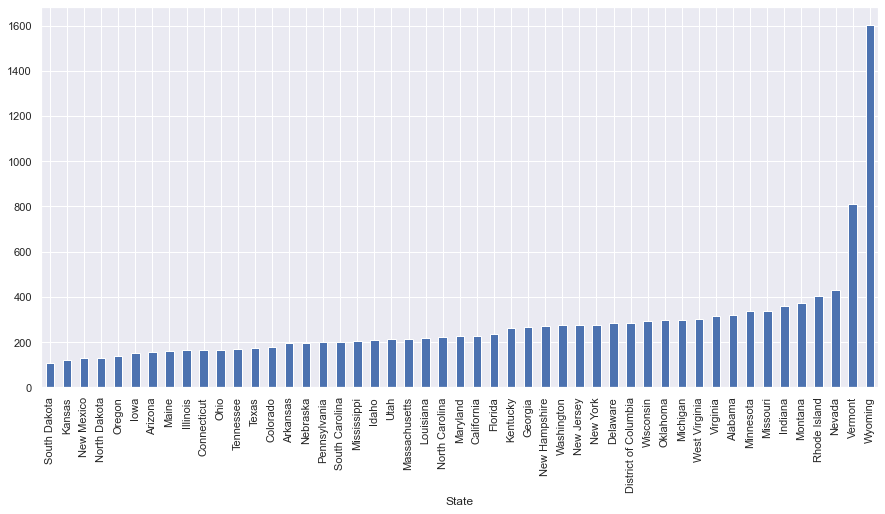

In [254]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))

<AxesSubplot: xlabel='State'>

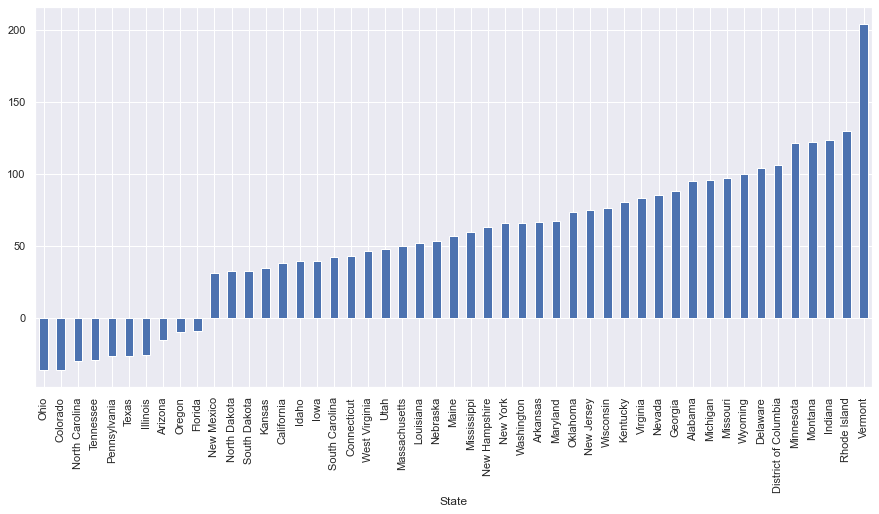

In [216]:
data_state1['Profit'].plot(kind='bar', figsize=(15,7))

<AxesSubplot: xlabel='State'>

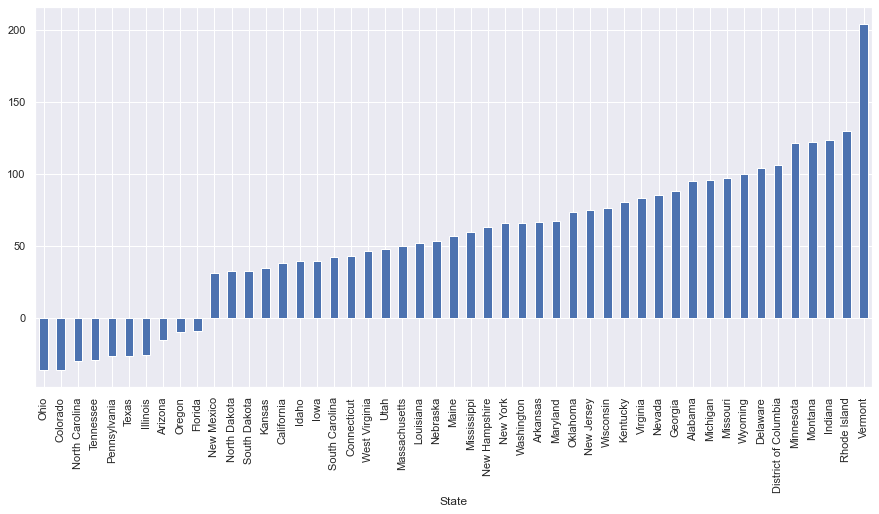

In [217]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))

# Same way can be done for Sales as well.

<AxesSubplot: xlabel='State'>

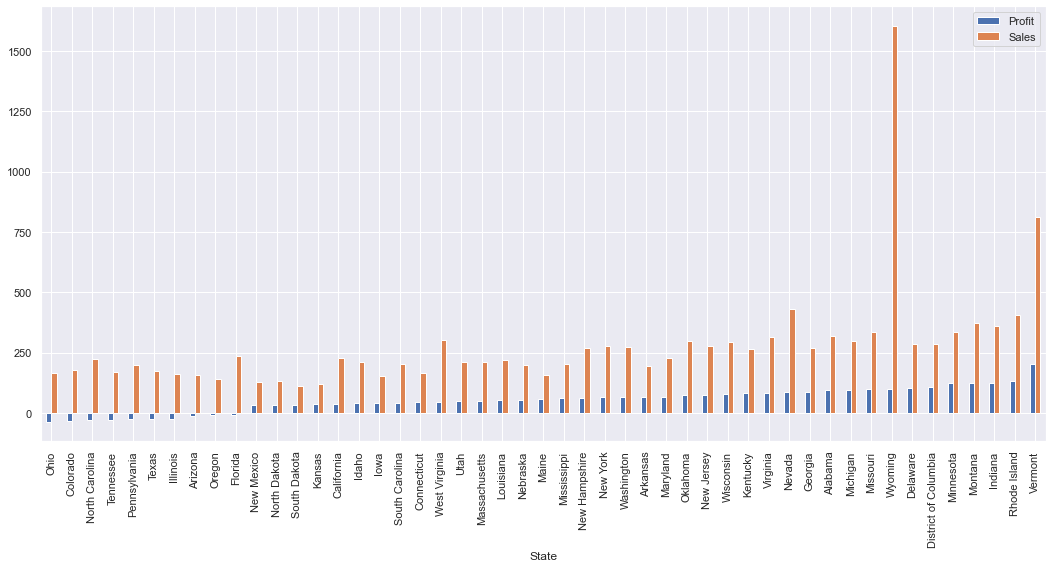

In [218]:
# Sorted by Profits
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

<AxesSubplot: xlabel='State'>

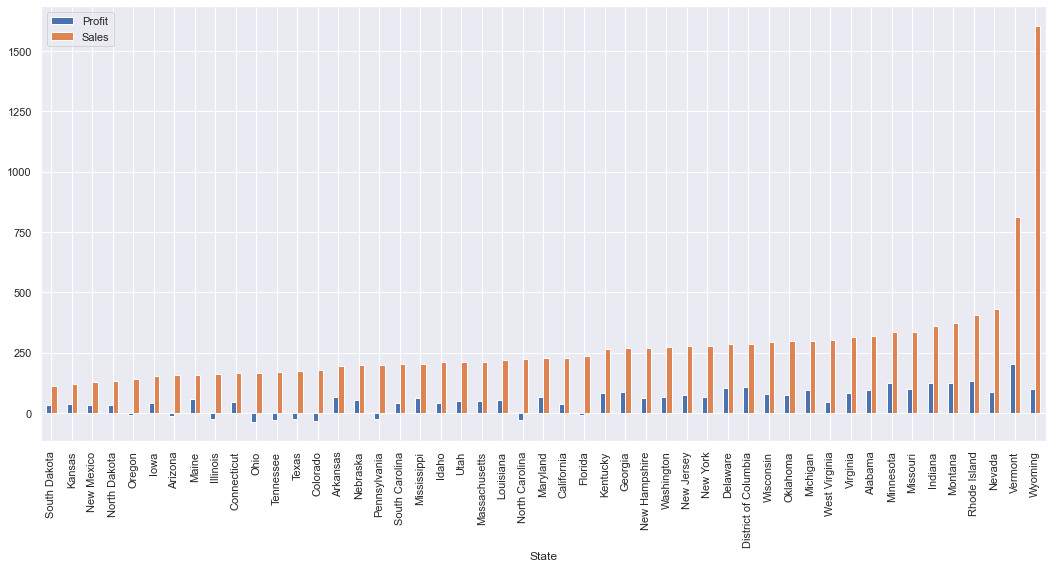

In [219]:
# Sorted by Sales
data_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

In [220]:
data_state.sum(axis=0)

Sales       13545.408037
Profit       2648.344280
Discount        4.076625
dtype: float64

In [221]:
data_state['Sales%'] = data_state['Sales']/135.454
data_state['Profit%'] = data_state['Profit']/26.483

Sales
Lowest sale: South Dakota(0.81%)
Highest sale: Wyoming(11.84%)
The company should focus on improving their sales in South dakota, kansas, new mexico, north dakota, oregon and few more states whose share in sales is miniscule
Profit
Lowest profit: Ohio(-1.4%)
Highest profit: Vermont(7.7%)
The company must ascertain reasons why 10 states are leading to a loss with Ohio leading the charts. Either the faults must be corrected or considering the present situation, if the company isn't able to come to the break-even point, the operations must be discontinued.

In [224]:
data_region2 = df.groupby(['Region'])[['Sales','Profit']].mean()

In [225]:
data_region2

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


In [226]:
data_region2.sum(axis=0)

Sales     922.405648
Profit    111.935221
dtype: float64

In [227]:
data_region2['Sales%'] = data_region2['Sales']/9.224
data_region2['Profit%'] = data_region2['Profit']/1.119

In [228]:
data_region2.sort_values('Profit')

,Sales,Profit,Sales%,Profit%
Region,,,,
Central,215.772661,17.092709,23.392526,15.274986
South,241.803645,28.857673,26.214619,25.788805
East,238.336110,32.135808,25.838694,28.718327
West,226.493233,33.849032,24.554774,30.249358


Sales
Lowest sales: Central(23.40%)
Highest sales: South(26.21%)
The sales seem fine in all the regions since the variation range is less, however steps can still be taken to improve the sales in Central zone.
Profit
Lowest profit: Central(15.27%)
Highest profit: West(30.25%)
The profits have to be looked at since the West zone is giving almost double the profit as compared to the central one, so the company will have to take steps to analyze the shortcoming in terms of both sales and profits for the central region

We can analyse the data further in 3 different ways

PRODUCT LEVEL ANALYSIS,
CUSTOMER LEVEL ANALYSIS,
ORDER LEVEL ANALYSIS

In [229]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [230]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [231]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

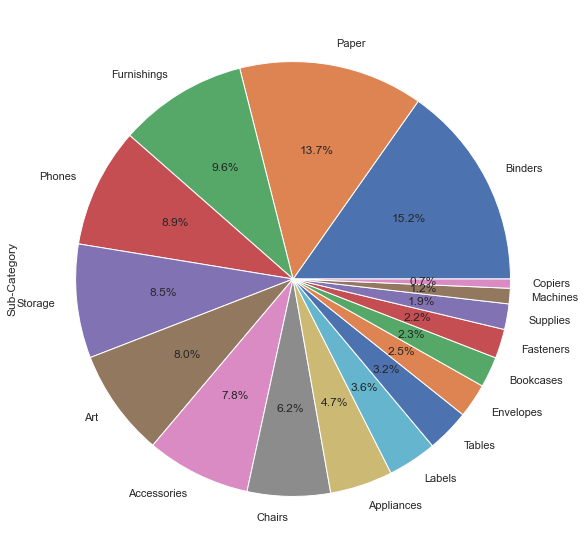

In [232]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-267-c3cea094cfd6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


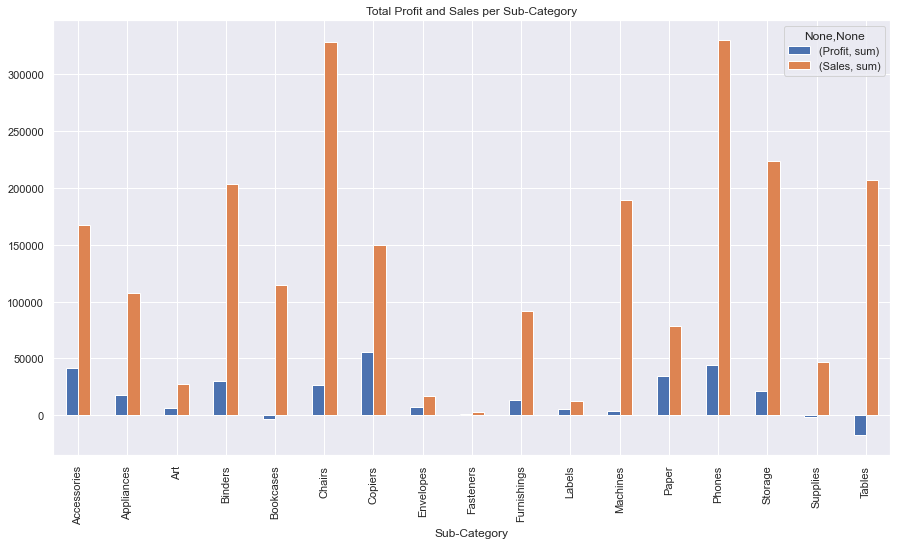

In [267]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [234]:
#number of products available in store
df['Product Name'].nunique()

1850

In [235]:
df['Product Name'].value_counts()

Staple envelope                                                      48
Easy-staple paper                                                    46
Staples                                                              46
Avery Non-Stick Binders                                              20
Staples in misc. colors                                              19
                                                                     ..
Belkin 7 Outlet SurgeMaster Surge Protector with Phone Protection     1
Vtech AT&T CL2940 Corded Speakerphone, Black                          1
Okidata B401 Printer                                                  1
Fellowes Smart Surge Ten-Outlet Protector, Platinum                   1
Ultra Commercial Grade Dual Valve Door Closer                         1
Name: Product Name, Length: 1850, dtype: int64

<AxesSubplot: ylabel='Product Name'>

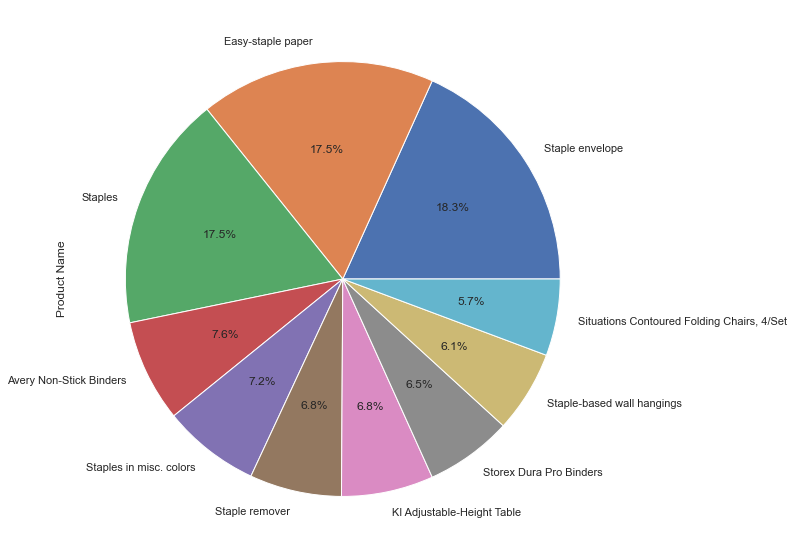

In [236]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

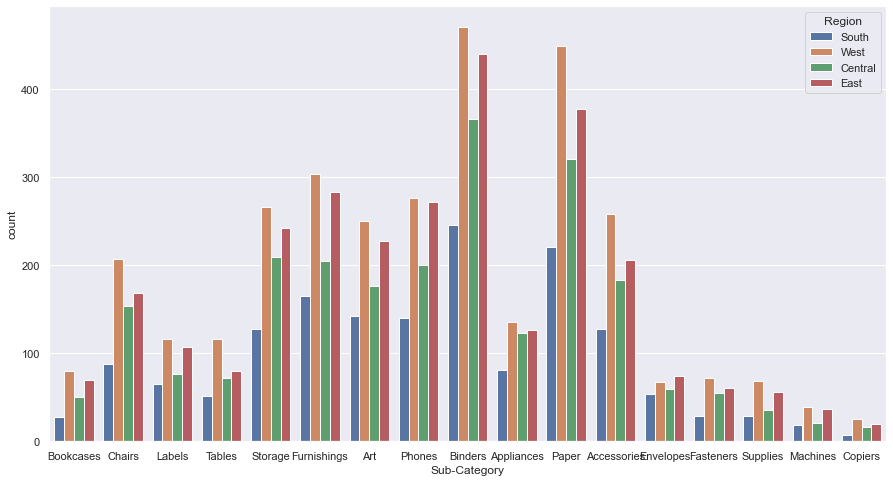

In [237]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [238]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [239]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [240]:
#Profit Percentage of first 5 product names
df.iloc[[0,1,2,3,4],[14,20]]

,Product Name,Profit %
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


In [249]:
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

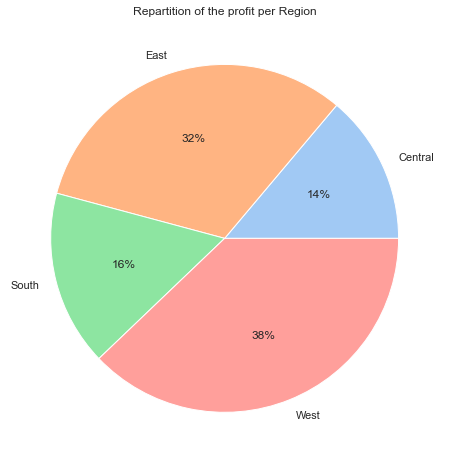

In [250]:
colors = sns.color_palette('pastel')[0:4]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the profit per Region")
plt.show()

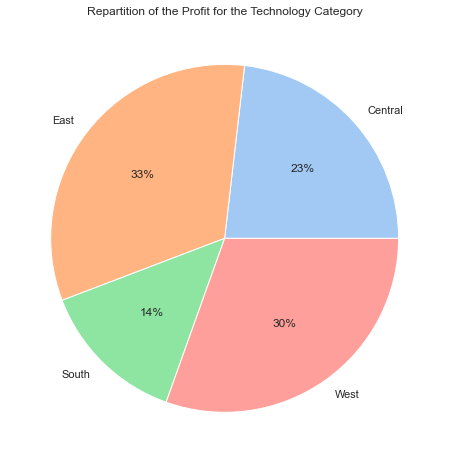

In [251]:
A = df[df['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

<ipython-input-278-ff042ca4f85a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(p.get_xticklabels(), rotation=75)


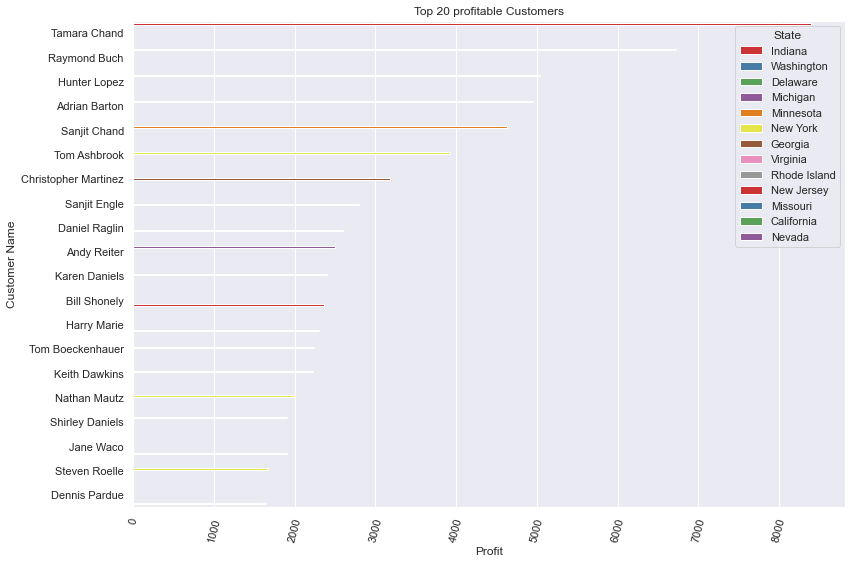

In [278]:
#Top 20 Customers who benefitted the store
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(y='Customer Name', x='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

<AxesSubplot: title={'center': 'Category Sales'}, ylabel='Category'>

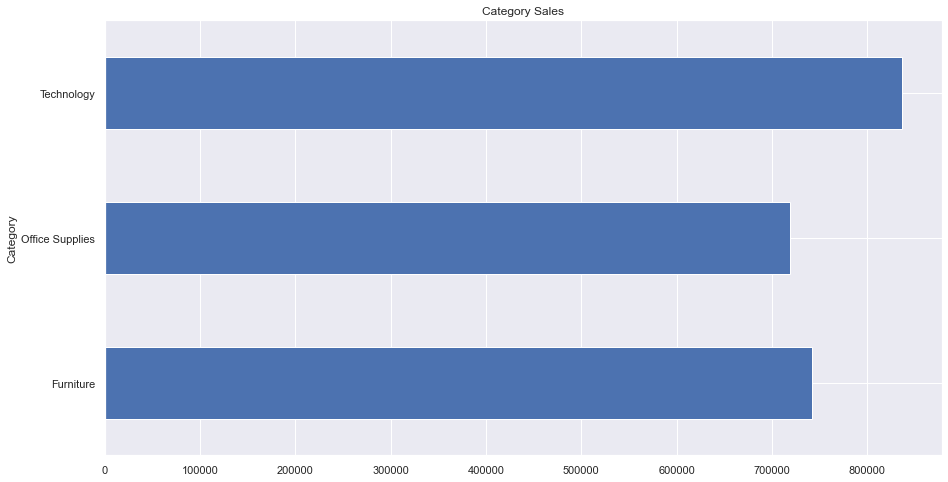

In [279]:
df.groupby('Category')['Sales'].sum().plot(kind='barh',title='Category Sales')

<AxesSubplot: title={'center': 'Quantity that has been sold'}, ylabel='Category'>

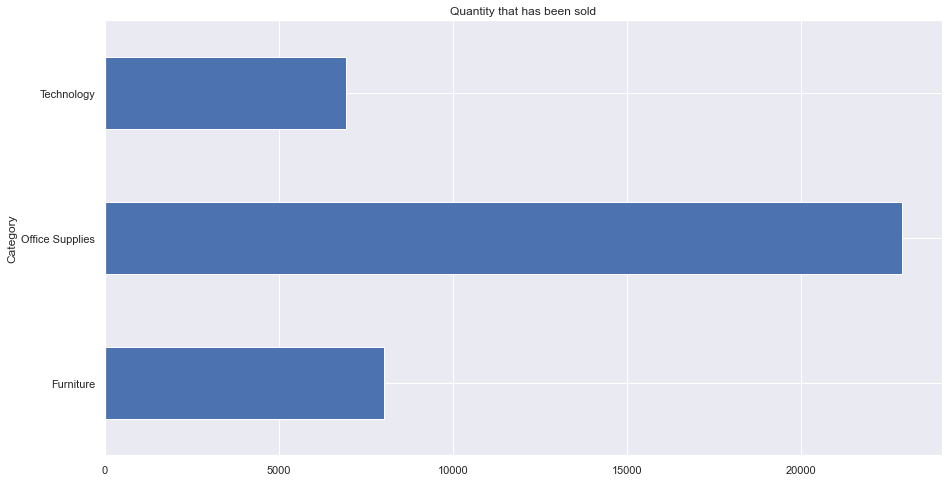

In [280]:
df.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity that has been sold')

<AxesSubplot: title={'center': 'Quantity that has been sold'}, ylabel='Region,Category'>

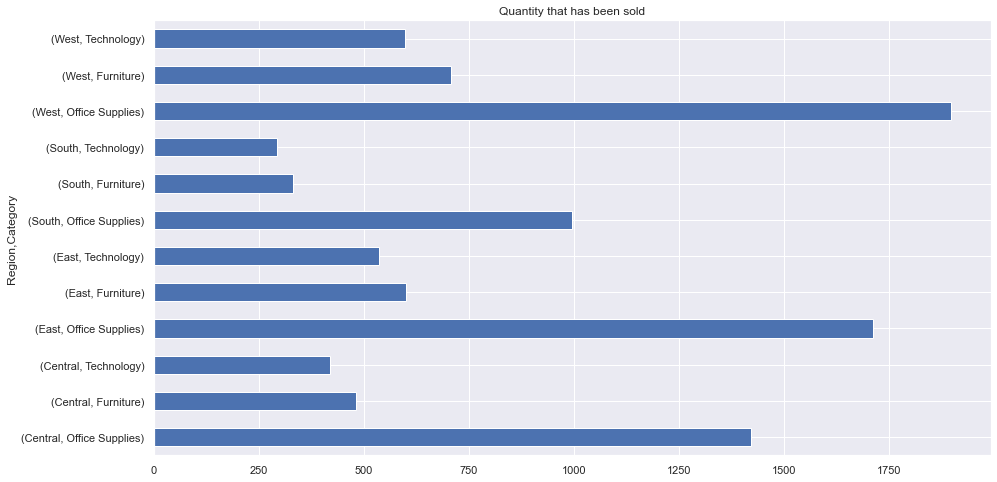

In [281]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

<AxesSubplot: title={'center': 'Category Profit'}, ylabel='Category'>

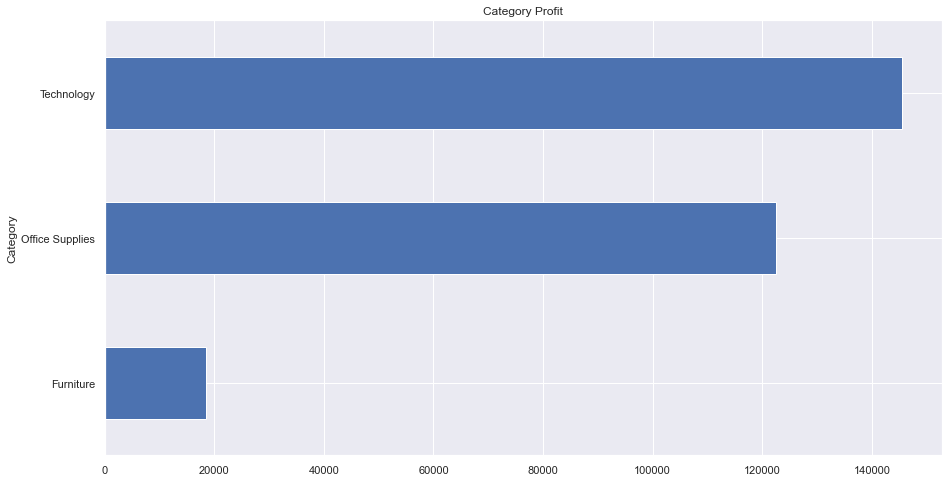

In [282]:
df.groupby('Category')['Profit'].sum().plot(kind='barh',title='Category Profit')

<AxesSubplot: title={'center': 'Quantity that has been sold'}, ylabel='Region,Category'>

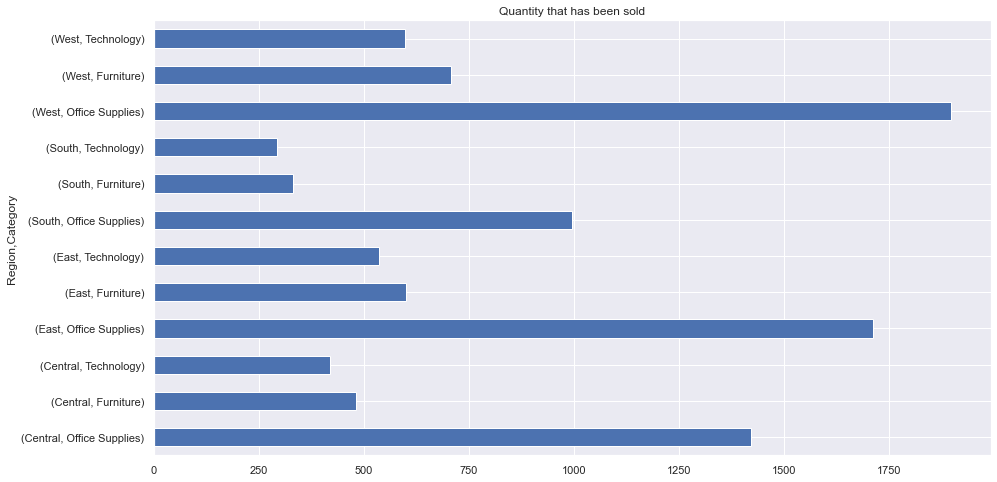

In [283]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

# Insights and Recommendation

- Focus on Technology categories like copiers, accessories and phones as they are highest selling and most profitable.

- Selling bookcases, tables and supplies result in losses, so I suggest Superstores to Consider bundling them together with High Profitable sub-category like copiers, accessories etc.

- Home Office customer might be too busy with work and less likely to spend time selecting products individually, so I recommend creating a Home Office Catalog with products used for offices such as paper, chairs, phone, copiers, storage, machines would result in better profits.

- I strongly Suggest consumers from East and West regions of top 10 cities with most profits to be targeted with special promotions and advertisements for copiers, accessories and phones.

- Among every region, west and east region recorded more profit. So, strategy should focus more on east and west region.
